In [1]:
import torch
print("Pytorch version: ", torch.__version__)
import fastai
print("Fastai version: ", fastai.__version__)
import tensorflow
print("Tensorflow version: ", tensorflow.__version__)
print("Cuda version: ", torch.version.cuda)

print("Is GPU working T/F: ", torch.cuda.is_available())
#torch.cuda.set_device(0)
#torch.cuda.get_device_name(0)
print("Which GPU is Cuda using? ", torch.cuda.device_count())

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from fastai.data.core import L
from fastai.vision.models import resnet18
from fastai.vision.models import densenet121
from fastai.vision.models import efficientnet_v2_l
from fastai.vision import *
from fastai.metrics import *
from fastai import *
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import auc,roc_curve
from sklearn.utils import resample
from numpy.random import default_rng
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
import torch
rng = default_rng(seed=42)

Pytorch version:  2.0.0
Fastai version:  2.7.12
Tensorflow version:  2.10.0
Cuda version:  11.8
Is GPU working T/F:  True
Which GPU is Cuda using?  1


c:\Users\breca\anaconda3\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


In [17]:
from fastai.vision.all import *
path = Path("D:/Schoolwork/Southern/Semester 4/Capstone/BreastCancerImagesV5")
"""
tfms = get_transforms(do_flip=True, 
                        flip_vert=True,
                        max_rotate=20., 
                        max_zoom=0.05)
len(tfms)
"""
path1 = Path("D:/Schoolwork/Southern/Semester 4/Capstone/BreastCancerImagesV3")
image_files = get_image_files(path1)

num_images = len(image_files)
print(num_images)
num_samples = 10000
random_index = rng.choice(np.arange(num_images),size=num_samples,replace=False)
reduced_files = image_files[random_index]
print(len(reduced_files))
test_frac = 0.2
num_test = int(num_samples*test_frac)

idxs = np.arange(num_samples)
rng.shuffle(idxs)
trainvalid_idxs, test_idxs = idxs[num_test:], idxs[:num_test]

trainvalid_image_files, test_image_files = image_files[trainvalid_idxs], image_files[test_idxs]
def get_trainvalid_image_files(x):
    return trainvalid_image_files

print(len(test_idxs))
print(len(trainvalid_idxs))

277524
10000
2000
8000


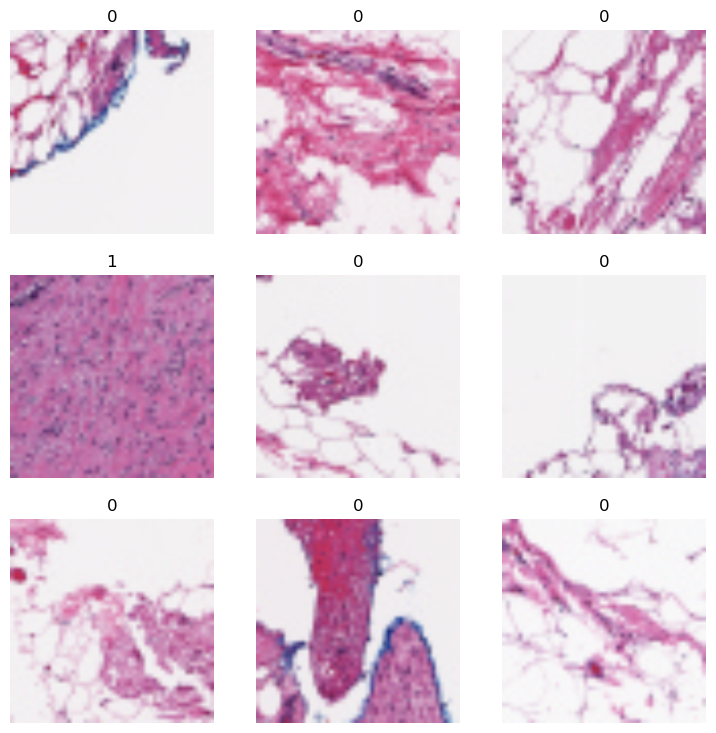

In [3]:
breastcancer_datablk = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_trainvalid_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=lambda x: parent_label(x).split('_')[-1],
    item_tfms=Resize(224)) #, batch_tfms=[Normalize.from_stats(*imagenet_stats)])


dls = breastcancer_datablk.dataloaders(path, bs = 16)
dls.show_batch()

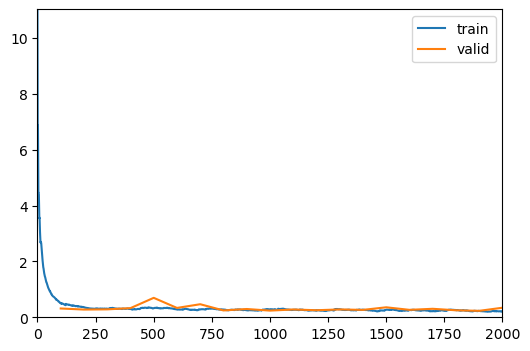

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       342
           1       0.75      0.52      0.61        58

    accuracy                           0.91       400
   macro avg       0.84      0.74      0.78       400
weighted avg       0.90      0.91      0.90       400

The MCC is:  0.5727525895990989


In [16]:
#Changing all the hyperparameters for alexnet
learn_alexnet = Learner(dls, alexnet(pretrained='false'), metrics=error_rate)
learn_alexnet.fit(20, 0.001, wd=0.01, cbs=[ShowGraphCallback()])

validationset_labels = [xy[-1] for xy in dls[1].dataset]
pred_probas, _, pred_classes = learn_alexnet.get_preds(dl=dls[1], with_decoded=True) 
accuracy_score(validationset_labels, pred_classes)

print(classification_report(validationset_labels,pred_classes))
print("The MCC is: ", matthews_corrcoef(validationset_labels,pred_classes))

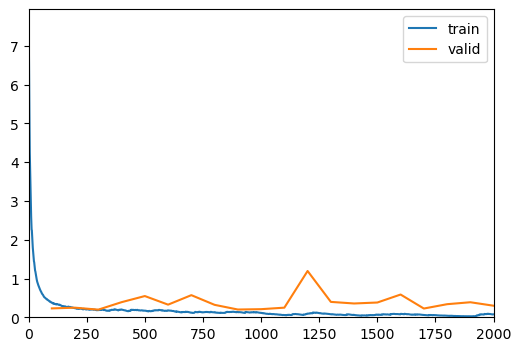

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       342
           1       0.89      0.59      0.71        58

    accuracy                           0.93       400
   macro avg       0.91      0.79      0.83       400
weighted avg       0.93      0.93      0.92       400

The MCC is:  0.6898891379323873


In [5]:
#Changing all the hyperparameters for googlenet
learn_googlenet = Learner(dls, googlenet(pretrained='false'), metrics=error_rate)
learn_googlenet.fit(20, 0.001, wd=0.01, cbs=[ShowGraphCallback()])

validationset_labels = [xy[-1] for xy in dls[1].dataset]
pred_probas, _, pred_classes = learn_googlenet.get_preds(dl=dls[1], with_decoded=True) 
accuracy_score(validationset_labels, pred_classes)

print(classification_report(validationset_labels,pred_classes))
print("The MCC is: ", matthews_corrcoef(validationset_labels,pred_classes))

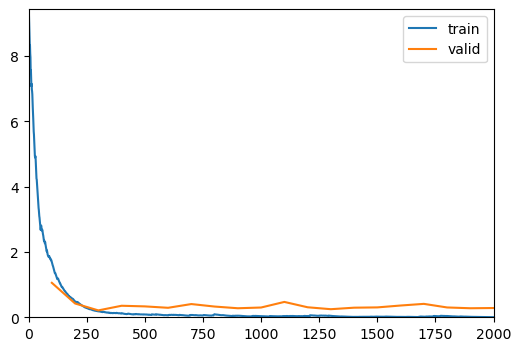

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       342
           1       0.79      0.76      0.77        58

    accuracy                           0.94       400
   macro avg       0.87      0.86      0.87       400
weighted avg       0.93      0.94      0.93       400

The MCC is:  0.7341962147382782


In [14]:
#Changing all the hyperparameters for resnet18
learn_resnet18 = Learner(dls, resnet18(pretrained='false'), metrics=error_rate)
learn_resnet18.fit(20, 0.0001, wd=0.01, cbs=[ShowGraphCallback()])

validationset_labels = [xy[-1] for xy in dls[1].dataset]
pred_probas, _, pred_classes = learn_resnet18.get_preds(dl=dls[1], with_decoded=True) 
accuracy_score(validationset_labels, pred_classes)

print(classification_report(validationset_labels,pred_classes))
print("The MCC is: ", matthews_corrcoef(validationset_labels,pred_classes))

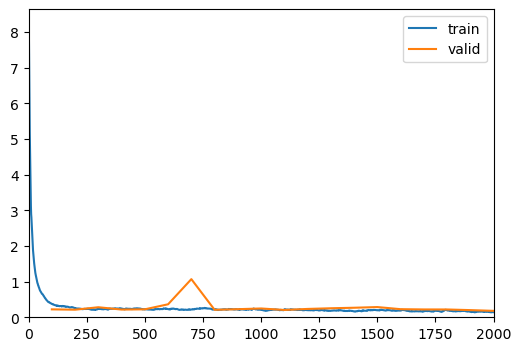

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       342
           1       0.78      0.74      0.76        58

    accuracy                           0.93       400
   macro avg       0.87      0.85      0.86       400
weighted avg       0.93      0.93      0.93       400

The MCC is:  0.7221379906222952


In [7]:
#Changing all the hyperparameters for densenet
learn_densenet = Learner(dls, densenet121(pretrained='false'), metrics=error_rate)
learn_densenet.fit(20, 0.001, wd=0.01, cbs=[ShowGraphCallback()])

validationset_labels = [xy[-1] for xy in dls[1].dataset]
pred_probas, _, pred_classes = learn_densenet.get_preds(dl=dls[1], with_decoded=True) 
accuracy_score(validationset_labels, pred_classes)

print(classification_report(validationset_labels,pred_classes))
print("The MCC is: ", matthews_corrcoef(validationset_labels,pred_classes))

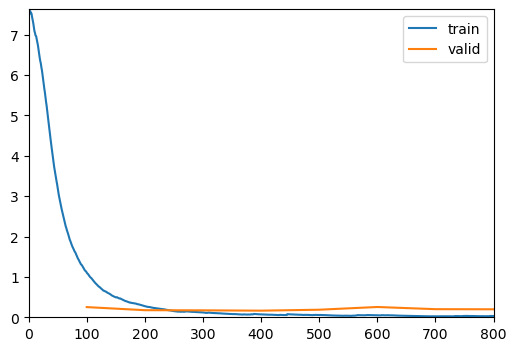

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       342
           1       0.74      0.84      0.79        58

    accuracy                           0.94       400
   macro avg       0.86      0.90      0.88       400
weighted avg       0.94      0.94      0.94       400

The MCC is:  0.7542486081342874


In [8]:
#Changing all the hyperparameters for efficientnet
learn_efficientnet = Learner(dls, efficientnet_b0(pretrained='false'), metrics=error_rate)
learn_efficientnet.fit(8, 0.0001, wd=0.01, cbs=[ShowGraphCallback()])

validationset_labels = [xy[-1] for xy in dls[1].dataset]
pred_probas, _, pred_classes = learn_efficientnet.get_preds(dl=dls[1], with_decoded=True) 
accuracy_score(validationset_labels, pred_classes)

print(classification_report(validationset_labels,pred_classes))
print("The MCC is: ", matthews_corrcoef(validationset_labels,pred_classes))

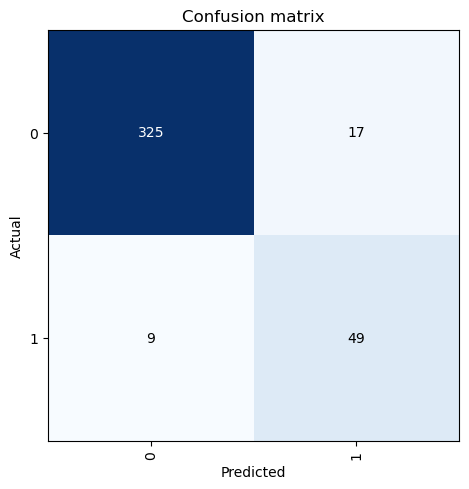

In [9]:
interp = ClassificationInterpretation.from_learner(learn_efficientnet)
losses,idxs = interp.top_losses()
print(len(dls.valid_ds)==len(losses)==len(idxs))
interp.plot_confusion_matrix()

In [10]:
# Predictions of the validation data
preds_val, y_val=learn_efficientnet.get_preds()

In [11]:
#  ROC curve
fpr, tpr, thresholds = roc_curve(y_val.numpy(), 
                                preds_val.numpy()[:,1], 
                                pos_label=1)

#  ROC area
pred_score = auc(fpr, tpr)
print(f'ROC area is {pred_score}')

ROC area is 0.9783222423875781


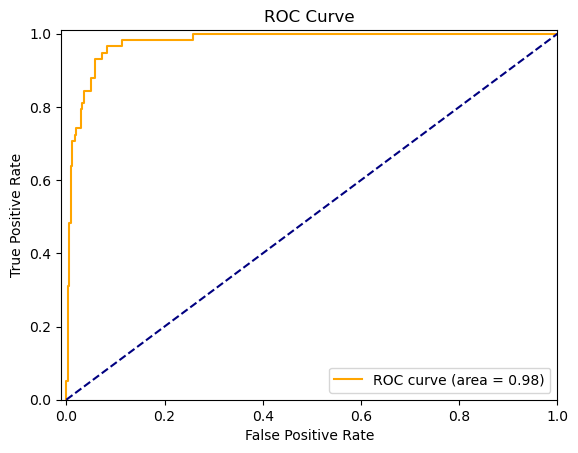

In [12]:
plt.figure()
plt.plot(fpr, 
        tpr, 
        color='orange', 
        label='ROC curve (area = %0.2f)' % pred_score)
plt.plot([0, 1], 
        [0, 1], 
        color='navy', 
        linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

In [13]:
#test set evaluation metrics
test_dl = learn_efficientnet.dls.test_dl(test_image_files, with_labels=True)
pred_probas, _, pred_classes = learn_efficientnet.get_preds(dl=test_dl, with_decoded=True) 
test_labels = [xy[-1] for xy in test_dl.dataset]
print(classification_report(test_labels,pred_classes))
print("The MCC is: ", matthews_corrcoef(test_labels,pred_classes))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       430
           1       0.72      0.90      0.80        70

    accuracy                           0.94       500
   macro avg       0.85      0.92      0.88       500
weighted avg       0.95      0.94      0.94       500

The MCC is:  0.7726570384411453
